### 1. seaborn pairplot
 - pairplot() : 각 칼럼들의 모든 상관 관계를 출력

In [4]:
# 라이브러리 불러오기

import seaborn as sns
import pandas as pd

In [6]:
train = pd.read_csv('train.csv')

In [8]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train.loc[:, 'fixed acidity' : 'chlorides']

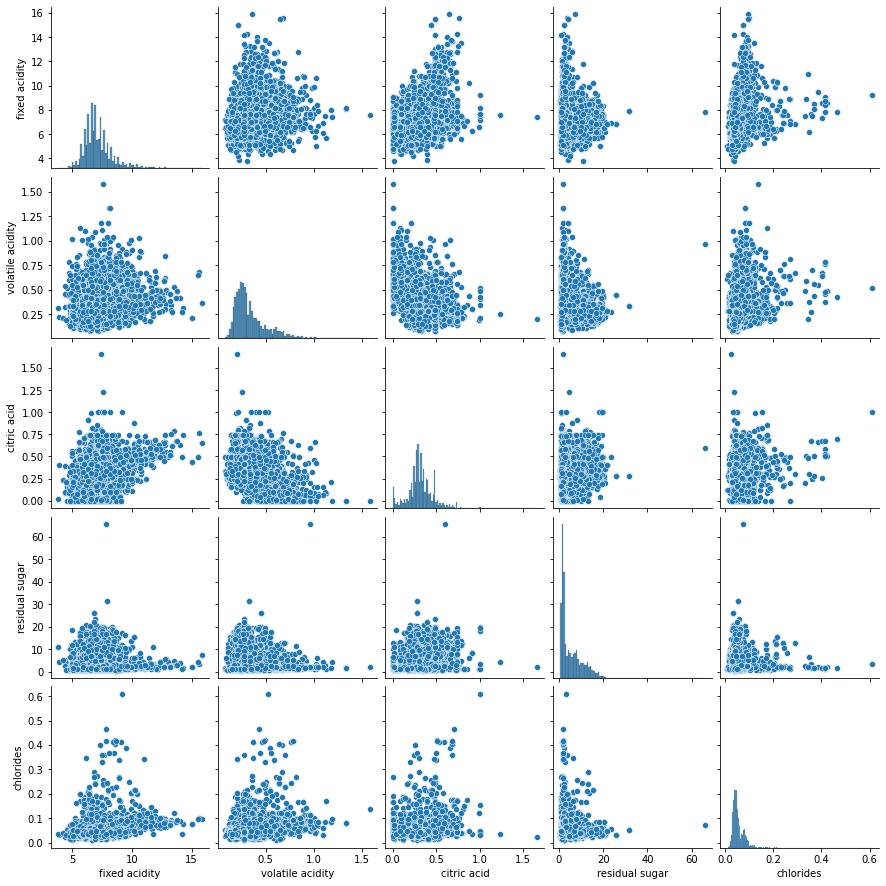

In [9]:
# data의 pairplot을 그려보세요

sns.pairplot(data)

### 2. seaborn distplot
 - distplot() : 데이터의 히스토그램을 그려주는 함수

In [10]:
# "data"라는 변수에 train의 "fixed acidity" 변수를 저장해주세요

data = train['fixed acidity']

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

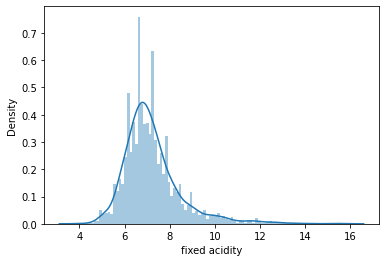

In [13]:
# data의 distplot을 그려보세요(bins = 100)

sns.distplot(data, bins = 100)

### 3. seaborn heatmap
 - Heat Map : 두 개의 범주형 변수에 대한 반응변수의 크기를 색깔의 변화로 표현하는 것
 - corr() : 데이터 변수간의 상관도를 출력하는 함수
 - heatmap(data) : 히트맵 그래프 그리기

In [14]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )
# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

data = train.corr()

<AxesSubplot:>

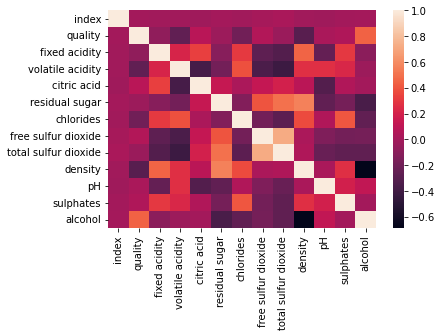

In [15]:
# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.

sns.heatmap(data)

### 4. 다중공선성 Scatter plot
 - 다중공선성 : 상관관계가 높은 독립변수들이 동시에 모델에 포함될 때 발생합니다.
 - 다중공선성 확인 방법
    - Scatter plot을 통해 확인
    - Heatmap 그래프를 통한 확인
    - VIF(Variance Inflation Factors)를 통한 확인

In [16]:
# Scatter Plot을 그릴 변수 지정 (x_data 에는 residual sugar변수, y_data 에는 density 변수)

x_data = train['residual sugar']
y_data = train['density']

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

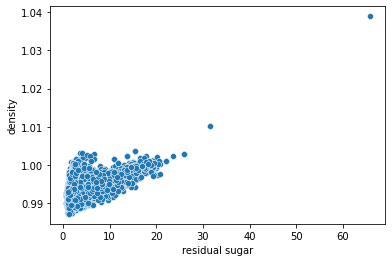

In [17]:
# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.

sns.scatterplot(x = x_data, y= y_data)

### 4. 다중공선성 VIF
 - VIF : 범위 1 부터 무한, 통계학에서는 10이상이면 해당 변수가 다중공선성이 있는 것으로 판단
    - 수식 : VIF_{k}=1/(1-R_j^2)

In [20]:
# 라이브러리 불러오기

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
# 범주형 변수 제거

train.drop('type', inplace=True, axis=1)

In [22]:
# 피처마다의 VIF 계수를 출력합니다.

# 결과값을 저장할 VIF라는 이름의 리스트 생성
vif = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

# variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정 
for i in range(len(train.columns)):
    vif.append(variance_inflation_factor(train_val, i))
    
vif

[4.007175138928272,
 64.10743200252591,
 59.14918709853955,
 9.610687118796196,
 9.273443884294641,
 3.616414435307183,
 5.7159808829777585,
 8.420882621285777,
 14.833789006276412,
 945.3239910887048,
 583.5011867251005,
 18.535849630077276,
 131.12669981396292]

In [23]:
# 데이터 프레임 형식으로 바꿔 가독성 높이기!

vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = train.columns
vif_dataframe['VIF'] = vif
vif_dataframe

,columns,VIF
0,index,4.007175
1,quality,64.107432
2,fixed acidity,59.149187
3,volatile acidity,9.610687
4,citric acid,9.273444
5,residual sugar,3.616414
6,chlorides,5.715981
7,free sulfur dioxide,8.420883
8,total sulfur dioxide,14.833789
9,density,945.323991


### 5. 변수 정규화(다중공선성 해결)
 - 다중공정성 해결 방법
    1. 변수 정규화
    2. 변수 제거
    3. PCA

In [24]:
# 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

In [26]:
train = pd.read_csv('train.csv')

train.drop('type', inplace=True, axis=1)

In [29]:
# train 데이터의 VIF 계수 출력

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [28]:
# MinMaxScaler를 통해 변수 변환

scaler = MinMaxScaler()
scaler.fit(train)
train_scale =scaler.transform(train)

In [30]:
# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df = pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns
vif

,VIF Factor,features
0,3.848628,index
1,14.491571,quality
2,37.792930,fixed acidity
3,6.978592,volatile acidity
4,9.094026,citric acid
5,14.246815,residual sugar
6,4.590877,chlorides
7,8.009056,free sulfur dioxide
8,11.227393,total sulfur dioxide
9,106.041429,density
